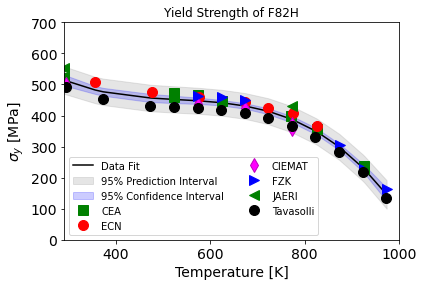

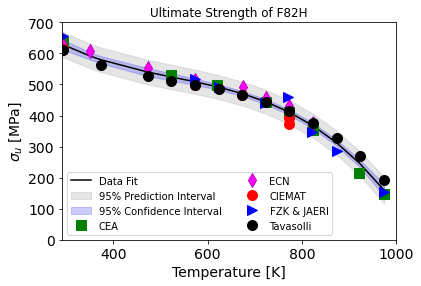

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
import statsmodels.formula.api as smf
%run Utilities_Indro.ipynb

excel_filename = 'F82H_Indro.xlsx'

yield_strength_col_names = ["T_CEA_y (K)", "CEA_y (MPa)",\
                            "T_ECN_y (K)", "ECN_y (MPa)",\
                            "T_CIEMAT_y (K)", "CIEMAT_y (MPa)",\
                            "T_FZK_y (K)", "FZK_y (MPa)",\
                            "T_JAERI_y (K)", "JAERI_y (MPa)"]

yield_strength_variables = ["T_CEA_y", "CEA_y",\
                            "T_ECN_y", "ECN_y",\
                            "T_CIEMAT_y", "CIEMAT_y",\
                            "T_FZK_y", "FZK_y",\
                            "T_JAERI_y", "JAERI_y"]

ultimate_strength_col_names = ["T_CEA_u (K)", "CEA_u (MPa)",\
                               "T_ECN_u (K)", "ECN_u (MPa)",\
                               "T_CIEMAT_u (K)", "CIEMAT_u (MPa)",\
                               "T_FZK_JAERI_u (K)", "FZK_JAERI_u (MPa)"]

ultimate_strength_variables = ["T_CEA_u", "CEA_u",\
                               "T_ECN_u", "ECN_u",\
                               "T_CIEMAT_u", "CIEMAT_u",\
                               "T_FZK_JAERI_u", "FZK_JAERI_u"]

load_data(excel_filename, "Yield Strength", yield_strength_col_names, yield_strength_variables)
load_data(excel_filename, "Ultimate Strength", ultimate_strength_col_names, ultimate_strength_variables)

fsize = 14 # font size
msize = 10 # marker size

# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)

# Additional data for fitting
theta = np.array([20, 100, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700])
s_y_tafa = np.array([491, 452, 432, 427, 423, 417, 408, 392, 367, 332, 282, 217, 134])
s_u_tafa = np.array([610, 563, 526, 512, 499, 484, 467, 444, 415, 377, 329, 269, 194])

# Concatenate and sort data for fitting
T_y, s_y = concatenate_and_sort([T_CEA_y, T_ECN_y, T_CIEMAT_y, T_FZK_y, T_JAERI_y, theta],\
                                [CEA_y, ECN_y, CIEMAT_y, FZK_y, JAERI_y, s_y_tafa])

T_u, s_u = concatenate_and_sort([T_CEA_u, T_ECN_u, T_CIEMAT_u, T_FZK_JAERI_u, theta],\
                                [CEA_u, ECN_u, CIEMAT_u, FZK_JAERI_u, s_u_tafa])

# Convert temperature to Kelvin
T_Ky = T_y + 273
T_Ku = T_u + 273

# Plotting Yield Strength of F82H
plt.figure('Yield Strength of F82H')
fit_df, results, prediction_summary_frame = get_conf_and_pred_intervals(T_Ky, s_y)
# Regression line
plt.plot(fit_df['X'], results.fittedvalues, color='black', label='Data Fit')
# Prediction interval
plt.fill_between(fit_df['X'], prediction_summary_frame['obs_ci_lower'], prediction_summary_frame['obs_ci_upper'], color='grey', alpha=0.2, label='95% Prediction Interval')
# Confidence interval
plt.fill_between(fit_df['X'], prediction_summary_frame['mean_ci_lower'], prediction_summary_frame['mean_ci_upper'], color='blue', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Temperature [K]', fontsize=fsize)
plt.ylabel(r'$\sigma_y$ [MPa]', fontsize=fsize)
plt.xlim([290, 1000])
plt.ylim([0, 700])
plt.title('Yield Strength of F82H')
plt.plot(T_CEA_y+273, CEA_y, 'gs', markersize=msize, markerfacecolor='green', label='CEA')
plt.plot(T_ECN_y+273, ECN_y, 'ro', markersize=msize, markerfacecolor='red', label='ECN')
plt.plot(T_CIEMAT_y+273, CIEMAT_y, 'md', markersize=msize, markerfacecolor='magenta', label='CIEMAT')
plt.plot(T_FZK_y+273, FZK_y, 'b>', markersize=msize, markerfacecolor='blue', label='FZK')
plt.plot(T_JAERI_y+273, JAERI_y, 'g<', markersize=msize, markerfacecolor='green', label='JAERI')
plt.plot(theta+273, s_y_tafa, 'ko', markersize=msize, markerfacecolor='black', label='Tavasolli')
plt.legend(loc='lower left', fontsize=10, ncol=2)
plt.tick_params(axis='both', which='major', labelsize=fsize)


def get_conf_and_pred_intervals(x, y):
    fit_data = {'X': x, 'Y': y}
    fit_df = pd.DataFrame(fit_data)
    
    # Ordinary Least Squares
    model = smf.ols(formula='Y ~ I(X**3) + I(X**2) + X + 1', data=fit_df)
    results = model.fit()
    
    # Calculating prediction
    predictions = results.get_prediction(fit_df)
    prediction_summary_frame = predictions.summary_frame(alpha=0.05)
    
    return fit_df, results, prediction_summary_frame

# Plotting Ultimate Strength of F82H
plt.figure('Ultimate Strength of F82H')
fit_df, results, prediction_summary_frame = get_conf_and_pred_intervals(T_Ku, s_u)
# Regression line
plt.plot(fit_df['X'], results.fittedvalues, color='black', label='Data Fit')
# Prediction interval
plt.fill_between(fit_df['X'], prediction_summary_frame['obs_ci_lower'], prediction_summary_frame['obs_ci_upper'], color='grey', alpha=0.2, label='95% Prediction Interval')
# Confidence interval
plt.fill_between(fit_df['X'], prediction_summary_frame['mean_ci_lower'], prediction_summary_frame['mean_ci_upper'], color='blue', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Temperature [K]', fontsize=fsize)
plt.ylabel(r'$\sigma_u$ [MPa]', fontsize=fsize)
plt.xlim([290, 1000])
plt.ylim([0, 700])
plt.title('Ultimate Strength of F82H')
plt.plot(T_CEA_u+273, CEA_u, 'gs', markersize=msize, markerfacecolor='green', label='CEA')
plt.plot(T_ECN_u+273, ECN_u, 'md', markersize=msize, markerfacecolor='magenta', label='ECN')
plt.plot(T_CIEMAT_u+273, CIEMAT_u, 'ro', markersize=msize, markerfacecolor='red', label='CIEMAT')
plt.plot(T_FZK_JAERI_u+273, FZK_JAERI_u, 'b>', markersize=msize, markerfacecolor='blue', label='FZK & JAERI')
plt.plot(theta+273, s_u_tafa, 'ko', markersize=msize, markerfacecolor='black', label='Tavasolli')
plt.legend(loc='lower left', fontsize=10, ncol=2)
plt.tick_params(axis='both', which='major', labelsize=fsize)